# A Notebook to Train a Classification Model for Pneumonia Detection

## Import Dependencies

In [43]:
import os
import yaml
from numpy import array
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import pyplot
from matplotlib.image import imread

from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Dropout,Dense,BatchNormalization, Conv2D, MaxPooling2D, Activation, Flatten
from tensorflow.keras.optimizers import Adam as adam
from sklearn.model_selection import train_test_split

from keras.preprocessing.image import load_img
from keras.models import load_model

## Load the Data

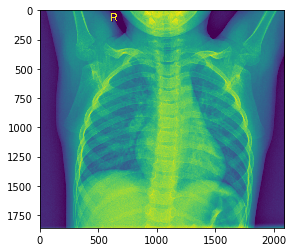

In [27]:
## Loading A sample Normal Image
filename = "Data/Train/NORMAL/IM-0115-0001.jpeg"
image = imread(filename)
pyplot.imshow(image)
pyplot.show()

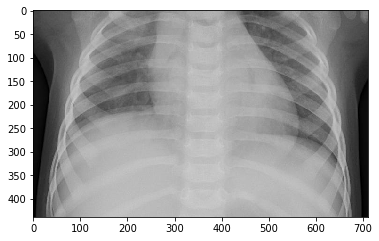

In [29]:
## Loading A sample Pneumonia Image
filename = "Data/Train/PNEUMONIA/person1_bacteria_1.jpeg"
image = imread(filename)
pyplot.imshow(image)
pyplot.show()

## Structurize Data for Model

In [20]:
"""
 Perform Data Augmentation: shearing, rotation, zooming, flipping etc.
 Make height and width dimensions of 300.
 
"""

'\n Perform Data Augmentation: shearing, rotation, zooming, flipping etc.\n Make height and width dimensions of 300.\n \n'

In [14]:
batch_size = 5

# Training Augmentation configuration
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255, 
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Testing Augmentation - Only Rescaling
test_datagen = ImageDataGenerator(rescale = 1./255)

# Generates batches of Augmented Image data
train_generator = train_datagen.flow_from_directory('Data/train/', target_size = (300, 300), 
                                                    batch_size = batch_size,
                                                    class_mode = 'binary') 

# Generator for validation data
validation_generator = test_datagen.flow_from_directory('Data/test/', 
                                                        target_size = (300, 300),
                                                        batch_size = batch_size,
                                                        class_mode = 'binary')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


## Build the Model

In [61]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(300, 300, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding = 'same'))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 298, 298, 32)      896       
_________________________________________________________________
activation_21 (Activation)   (None, 298, 298, 32)      0         
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 147, 147, 64)      18496     
_________________________________________________________________
activation_22 (Activation)   (None, 147, 147, 64)      0         
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 71, 71, 128)     

## Train the Model

In [38]:
history = model.fit_generator(train_generator,
                    epochs = 4,
                    validation_data = validation_generator,
                    verbose = 1)

loss, accuracy = model.evaluate(validation_generator)

print("\nModel's Evaluation Metrics: ")
print("---------------------------")
print("Accuracy: {} \nLoss: {}".format(accuracy, loss))

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 1044 steps, validate for 125 steps
Epoch 1/10
1044/1044 [==============================] - 708s 678ms/step - loss: 0.4809 - accuracy: 0.8374 - val_loss: 2.6936 - val_accuracy: 0.6250
Epoch 2/10
1044/1044 [==============================] - 635s 609ms/step - loss: 0.4073 - accuracy: 0.8859 - val_loss: 0.5716 - val_accuracy: 0.7981
Epoch 3/10
1044/1044 [==============================] - 635s 608ms/step - loss: 0.3724 - accuracy: 0.8852 - val_loss: 0.5519 - val_accuracy: 0.8173
Epoch 4/10
1044/1044 [==============================] - 618s 592ms/step - loss: 0.3619 - accuracy: 0.8926 - val_loss: 0.6001 - val_accuracy: 0.7548
Epoch 5/10
1044/1044 [==============================] - 619s 593ms/step - loss: 0.3278 - accuracy: 0.8942 - val_loss: 1.1406 - val_accuracy: 0.7885
Epoch 6/10
1044/1044 [==============================] - 664s 636ms/step - loss: 0.3222 - accuracy: 0.9043 - val_loss: 0.6236 - val_accuracy: 0.7548
Epoch 7/10
1044/1

## Plot the Training Graphs

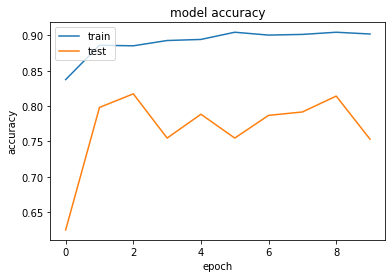

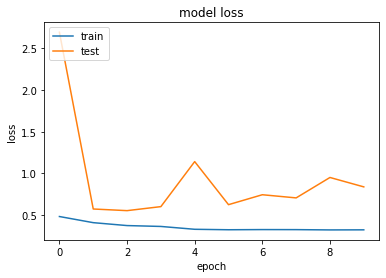

In [42]:
'''
method: plot_training
input_parameters: history
output_parameters: none
description: This method plots the training and validation performance over the epochs.
'''


def plot_training(history):
    # Accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # Loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

plot_training(history)

## Save the Model

In [44]:
model.save("disease_classifier.h5")

## Test The Model

In [52]:
def load_image(filename):
    img = load_img(filename, target_size=(300, 300))
    img = img_to_array(img) 
    img = np.expand_dims(img, axis=0)
    return img
 
img = load_image('Data/test/NORMAL/IM-0003-0001.jpeg')
model = tf.keras.models.load_model('disease_classifier.h5')
result = model.predict(img)
np.argmax(result[0])

0

In [62]:
def load_image(filename):
    img = load_img(filename, target_size=(300, 300))
    img = img_to_array(img) 
    img = np.expand_dims(img, axis=0)
    return img
 
img = load_image('Data/test/PNEUMONIA/person141_bacteria_676.jpeg')
model = tf.keras.models.load_model('disease_classifier.h5')
result = model.predict(img)
np.argmax(result[0])

0